In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
df = pd.read_csv("C:\Datatrek\Data Science Solution project\payment_fraud.csv")
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


Basic Data Exploration

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [79]:
df.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000


In [80]:
df.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

In [81]:
df['label'].value_counts(normalize=False)

label
0    38661
1      560
Name: count, dtype: int64

In [ ]:
# coverting paymentMethod column into label encoding

PaymentMethod = {v:k for k, v in enumerate(df.paymentMethod.unique())}
df.paymentMethod = df.paymentMethod.map(PaymentMethod)
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,0,28.204861,0
1,725,1,4.742303,1,0.000000,0
2,845,1,4.921318,2,0.000000,0
3,503,1,4.886641,2,0.000000,0
4,2000,1,5.040929,2,0.000000,0


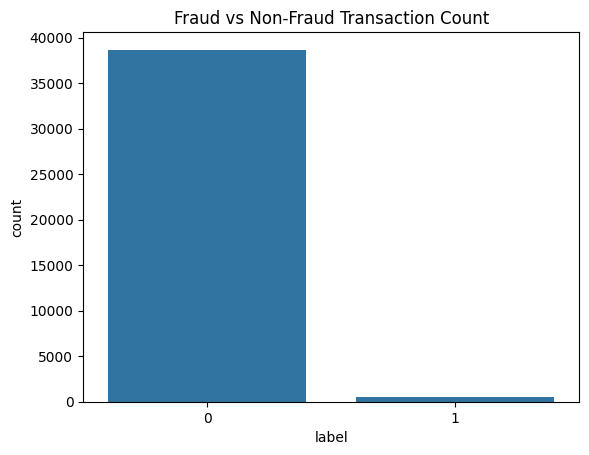

In [ ]:
# Visualize Class Distribution

sns.countplot(x='label',data=df)
plt.title('Fraud vs Non-Fraud Transaction Count')
plt.show()

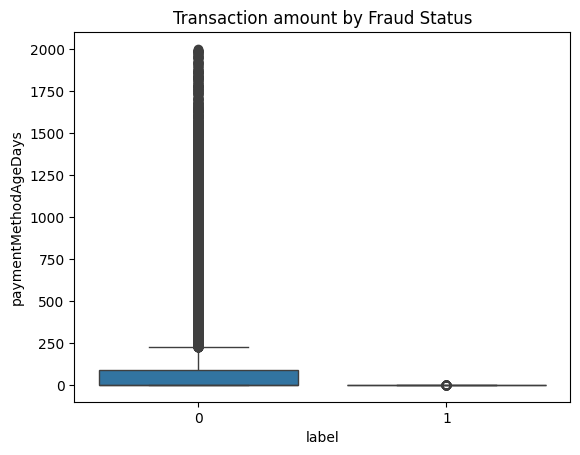

In [ ]:
# Explore Relationships

sns.boxplot(x='label',y='paymentMethodAgeDays',data=df)
plt.title('Transaction amount by Fraud Status')
plt.show()

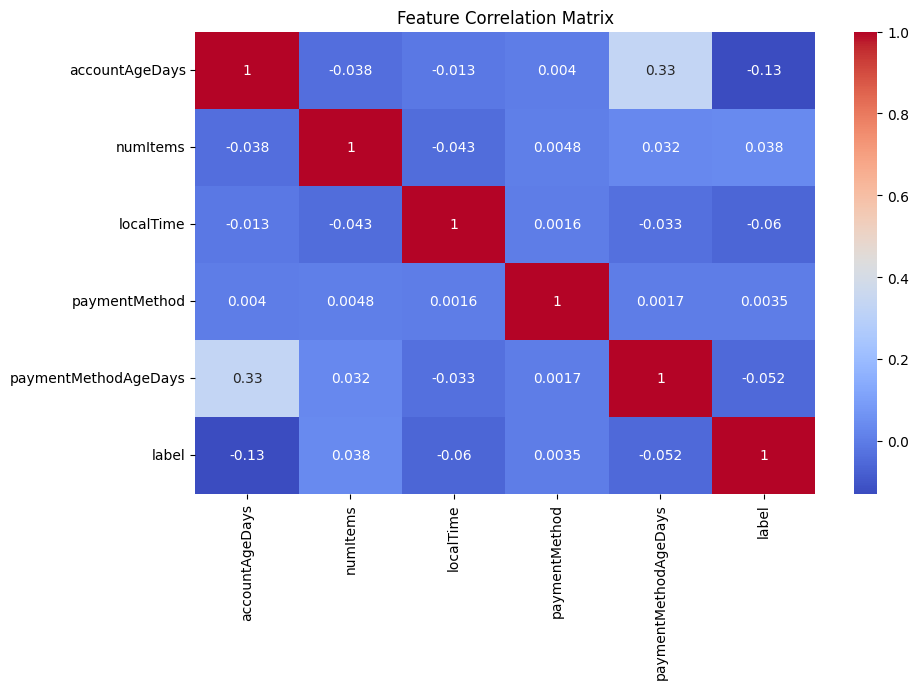

In [ ]:
# Correlation & Feature Selection

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [86]:
df.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'label'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  int64  
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.8 MB


In [88]:
df.head(10)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,0,28.204861,0
1,725,1,4.742303,1,0.000000,0
2,845,1,4.921318,2,0.000000,0
3,503,1,4.886641,2,0.000000,0
4,2000,1,5.040929,2,0.000000,0
5,119,1,4.962055,0,0.000000,0
6,2000,1,4.921349,0,0.000000,0
7,371,1,4.876771,2,0.000000,0
8,2000,1,4.748314,2,0.000000,0
9,4,1,4.461622,2,0.000000,0


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [90]:
x = df.drop('label',axis=1) #Features
y = df['label'] #Traget 

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42) # Split data

In [93]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest

In [94]:
#Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [95]:
#Predict
y_pred = model.predict(X_test_scaled)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ \n")
print(confusion_matrix(y_test,y_pred))
print("_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ \n")
print(classification_report(y_test,y_pred)) 

Accuracy: 1.0
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

[[9664    0]
 [   0  142]]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9664
           1       1.00      1.00      1.00       142

    accuracy                           1.00      9806
   macro avg       1.00      1.00      1.00      9806
weighted avg       1.00      1.00      1.00      9806



Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
lg = LogisticRegression() # logisticRegression Model
lg.fit(X_train,y_train) # training

LogisticRegression()

In [98]:
pred = lg.predict(X_test) # prediction

In [99]:
print("----------------------------------------------------Accuracy------------------------------------------------------")
print(accuracy_score(y_test, pred))
print()

print("---------------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))
print()

print("-------------------------------------------------Confustion Metrics----------------------------------------------------")
print(confusion_matrix(y_test, pred))

----------------------------------------------------Accuracy------------------------------------------------------
1.0

---------------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9664
           1       1.00      1.00      1.00       142

    accuracy                           1.00      9806
   macro avg       1.00      1.00      1.00      9806
weighted avg       1.00      1.00      1.00      9806


-------------------------------------------------Confustion Metrics----------------------------------------------------
[[9664    0]
 [   0  142]]


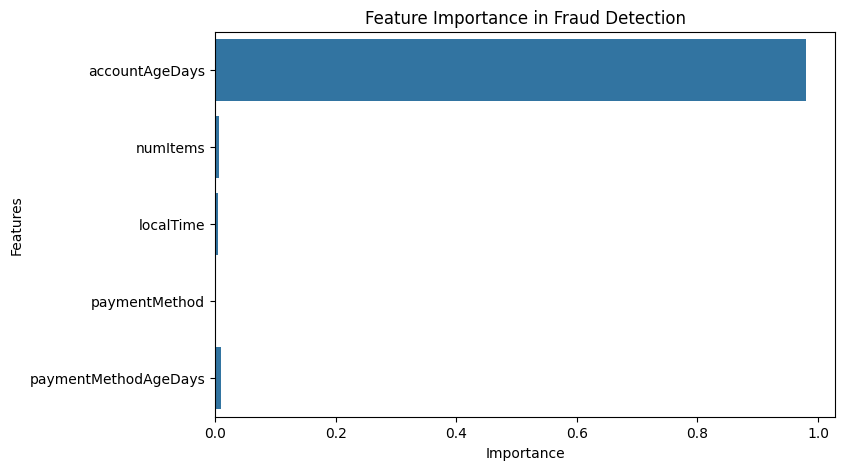

In [100]:
# Feature importance
importances = model.feature_importances_
feature_name = x.columns

#plot
plt.figure(figsize= (8,5))
sns.barplot(x=importances,y= feature_name)
plt.title("Feature Importance in Fraud Detection")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()